In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

In [3]:
X = np.load('/content/drive/My Drive/X_label6.npy')
Y = np.load('/content/drive/My Drive/Y_label6.npy')

In [4]:
X.shape

(609, 224, 224, 3)

In [5]:
Y[580]

'Viable'

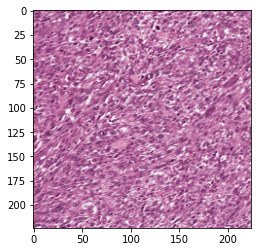

In [6]:
plt.imshow(X[300])

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [8]:
Y[580]

1

In [9]:
#X= (X/255.0)

X= (X-np.mean(X))/np.std(X)

In [10]:
model= Sequential()
model.add(Conv2D(32, (3,3), input_shape= (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Dropout(.25))

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(optimizer= 'Adam', loss= 'binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

In [11]:
"""epochs = 50
batch_size = 16
from keras import applications
# build the VGG16 network
model = applications.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(3, activation='softmax'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])"""

"epochs = 50\nbatch_size = 16\nfrom keras import applications\n# build the VGG16 network\nmodel = applications.VGG16(weights='imagenet', include_top=False)\nprint('Model loaded.')\n\n# build a classifier model to put on top of the convolutional model\ntop_model = Sequential()\ntop_model.add(Flatten(input_shape=model.output_shape[1:]))\ntop_model.add(Dense(256, activation='relu'))\ntop_model.add(Dropout(0.5))\ntop_model.add(Dense(3, activation='softmax'))\n\n# note that it is necessary to start with a fully-trained\n# classifier, including the top classifier,\n# in order to successfully do fine-tuning\ntop_model.load_weights(top_model_weights_path)\n\n# add the model on top of the convolutional base\nmodel.add(top_model)\n\n# set the first 25 layers (up to the last conv block)\n# to non-trainable (weights will not be updated)\nfor layer in model.layers[:25]:\n    layer.trainable = False\n\n# compile the model with a SGD/momentum optimizer\n# and a very slow learning rate.\nmodel.compile

In [12]:
"""from keras.applications.vgg16 import VGG16
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)"""

"from keras.applications.vgg16 import VGG16\nIMAGE_SIZE = [224, 224]\nvgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)"

In [13]:
"""for layer in vgg.layers:
  layer.trainable = False"""

'for layer in vgg.layers:\n  layer.trainable = False'

In [14]:
"""# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(3, activation='softmax')(x)"""

"# our layers - you can add more if you want\nx = Flatten()(vgg.output)\n# x = Dense(1000, activation='relu')(x)\nprediction = Dense(3, activation='softmax')(x)"

In [15]:
"""# create a model object
from keras.models import Model
model = Model(inputs=vgg.input, outputs=prediction)"""

'# create a model object\nfrom keras.models import Model\nmodel = Model(inputs=vgg.input, outputs=prediction)'

In [16]:
"""# view the structure of the model
model.summary()"""

'# view the structure of the model\nmodel.summary()'

In [17]:
"""# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)"""

"# tell the model what cost and optimization method to use\nmodel.compile(\n  loss='sparse_categorical_crossentropy',\n  optimizer='adam',\n  metrics=['accuracy']\n)"

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X, Y, test_size= .2, random_state= 3)
xtrain,xval,ytrain,yval= train_test_split(xtrain,ytrain,test_size= .2, random_state= 2)

In [19]:
from collections import Counter
print(Counter(ytest))

Counter({1: 69, 0: 53})


In [20]:
#Dimension of this dataset
print((xtrain.shape,ytrain.shape))
print((xtest.shape,ytest.shape))

((389, 224, 224, 3), (389,))
((122, 224, 224, 3), (122,))


In [21]:
ytest[100]

1

In [22]:
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rotation_range=360,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
train_datagen.fit(xtrain)
train_generator= train_datagen.flow(xtrain, ytrain, batch_size=16)

In [23]:
#Training the model
from datetime import datetime
start_time = datetime.now()
# do your work here

history= model.fit_generator(train_generator, epochs = 50, validation_data= (xval,yval))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
25/25 [==============================] - 25s 292ms/step - loss: 2.0448 - accuracy: 0.5733 - val_loss: 0.5261 - val_accuracy: 0.7959
Epoch 2/50
25/25 [==============================] - 5s 196ms/step - loss: 0.5549 - accuracy: 0.7751 - val_loss: 0.4285 - val_accuracy: 0.8571
Epoch 3/50
25/25 [==============================] - 5s 197ms/step - loss: 0.3931 - accuracy: 0.8375 - val_loss: 0.3425 - val_accuracy: 0.8673
Epoch 4/50
25/25 [==============================] - 5s 201ms/step - loss: 0.3080 - accuracy: 0.8824 - val_loss: 0.3171 - val_accuracy: 0.8878
Epoch 5/50
25/25 [==============================] - 5s 203ms/step - loss: 0.3677 - accuracy: 0.8601 - val_loss: 0.4829 - val_accuracy: 0.7449
Epoch 6/50
25/25 [==============================] - 5s 202ms/step - loss: 0.3855 - accuracy: 0.8404 - val_loss: 0.3416 - val_accuracy: 0.8571
Epoch 7/50
25/25 [==============================] - 5s 199ms/step - loss: 0.3103 - accuracy: 0.8916 - val_loss: 0.3869 - val_accuracy: 0.8061
Epoch

In [24]:
model.evaluate(xtest,ytest)

4/4 [==============================] - 1s 273ms/step - loss: 0.1749 - accuracy: 0.9344


[0.17488501965999603, 0.9344262480735779]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


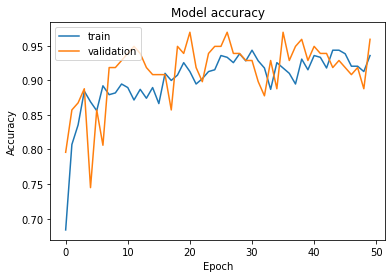

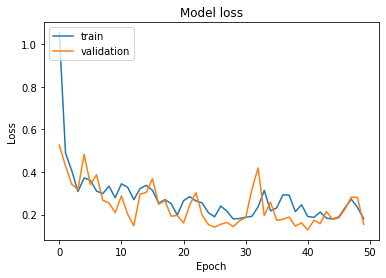

In [25]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
pred= model.predict(xtest)

In [27]:
"""pred = np.argmax(pred,axis=1)
pred"""

'pred = np.argmax(pred,axis=1)\npred'

In [28]:
result = []
for i in (pred):
  if i>0.5:
    result.append(1)
  else:
    result.append(0)

In [29]:
Y_pred = np.array(result)
Y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(ytest, Y_pred)
print(classification_report(ytest, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.93      0.96      0.94        69

    accuracy                           0.93       122
   macro avg       0.94      0.93      0.93       122
weighted avg       0.93      0.93      0.93       122



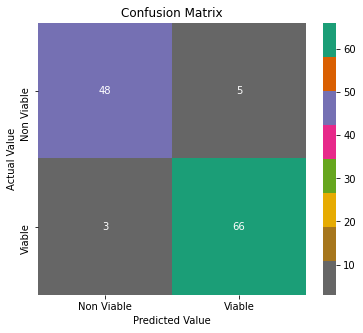

In [31]:
cm_df=pd.DataFrame(cm,index=['Non Viable','Viable'],columns=['Non Viable','Viable'])
plt.figure(figsize=(6,5))
import seaborn as sns
sns.heatmap(cm_df,annot=True,fmt='d',cmap='Dark2_r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()